# PCA - Principal Component Analysis

### Introduction to PCA
Principal Component Analysis (PCA) is a mathematical technique used for **dimensionality reduction**, which aims to **simplify the complexity of high-dimensional datasets while retaining most of their important information**. The fundamental idea behind PCA is to transform the original variables into a new set of **uncorrelated variables called principal components**. These principal components are **obtained by linearly combining the original variables** in such a way that the **first principal component captures the maximum possible variation** in the data, the **second principal component captures the second most variation**, and so on.

In other words, PCA is a **variance-based** method that seeks to identify the **directions with the maximum variance** in the data. PCA is a technique used in data analysis to **reduce the number of variables (features)** in a dataset while **keeping the most important information**. It works by finding the most **relevant** patterns in the data and **representing them with fewer variables**, called principal components. This can make it **easier to analyze and visualize the data**, especially when dealing with large datasets. 

### PCA Mathematics
Mathematically, PCA involves the following steps:

**Standardization**: The original variables are standardized to have a *mean of zero and a variance of one*. This step is necessary because variables that are on different scales can bias the results of PCA towards those with larger variances.

**Covariance Matrix Calculation**: The covariance matrix is calculated from the standardized data. The covariance matrix measures *how much two variables vary together*. It is a square matrix with the same number of rows and columns as the number of variables in the dataset.

**Eigendecomposition of the Covariance Matrix**: The covariance matrix is then decomposed into its *eigenvectors and eigenvalues*. The *eigenvectors are the directions* in which the data varies the most, and the *eigenvalues are the amount of variance* in the data explained by each eigenvector.

**Selection of Principal Components**: The *eigenvectors are sorted in descending order of their corresponding eigenvalues*. The *eigenvector with the largest eigenvalue is the first principal component*, the *eigenvector with the second-largest eigenvalue is the second principal component*, and so on.

**Projection of Data onto Principal Components**: The original data is *projected onto the principal components to transform the data* into the lower-dimensional space spanned by these components. This *projection is accomplished by taking the dot product of the standardized data with the eigenvectors*, which are the principal components.

For example, let's say we have a matrix of standardized data $X$ of size $n\times p$, where $n$ is the number of samples and $p$ is the number of features. We perform PCA on this matrix to obtain the eigenvectors $V$ of size $p\times p$ and their corresponding eigenvalues $D$ of size $p\times p$. We can then project the standardized data onto the first $k$ principal components to obtain the transformed data $X_k$ of size $n\times k$: 

$X_k = XV_k$, where $V_k$ is the matrix containing the first $k$ eigenvectors of $V$.

The resulting transformed data can be thought of as a new representation of the original data that retains the most important information in a smaller number of dimensions. The transformed data can then be used for further analysis, such as visualization, clustering, or classification.

# PCA implementation

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### Load the data

In [2]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# Print the description of the data
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# Create a pandas dataframe from the data
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scale the data

Scale the data using the StandardScaler method from scikit-learn, which standardizes the data to have a mean of zero and unit variance.

In [6]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [7]:
scaled_data = scaler.transform(df)

In [8]:
# Create a pandas dataframe from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=cancer['feature_names'])

In [9]:
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
# Print the shape of the data before PCA
print(f'Shape of scaled data before: {scaled_df.shape}')

Shape of scaled data before: (569, 30)


### Do PCA with custom class

In [11]:
class PCA_:
    '''
    Principal Component Analysis (PCA) class for dimensionality reduction.
    '''
    def __init__(self, n_components=None):
        '''
        Initializes the PCA object.
        '''
        self.n_components = n_components
        
    def covariance_matrix(self, X):
        '''
        Computes the covariance matrix of the dataset X.
        '''
        return np.cov(X, rowvar=False) # each column represents a variable, while the rows contain observations
     
    def fit_transform(self, X):
        '''
        Fits the PCA model to the dataset X and returns the transformed data.
        '''
        # Compute the covariance matrix of the data
        matrix = self.covariance_matrix(X)
        
        # Compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(matrix)
        
        # Select the top eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:,sorted_indices]
        top_eigenvectors = sorted_eigenvectors[:,0:self.n_components]

        # Compute the reduced data
        X_transformed =  np.dot(X, top_eigenvectors)
         
        return X_transformed

#### 2D

In [12]:
pca_2d = PCA_(n_components=2)
pca_data_2d = pca_2d.fit_transform(scaled_df)

The *n_components* parameter is set to 2, indicating that we want to reduce the dimensionality of the data to 2 principal components, as we want to visualize the data in 2 dimensions. As a result, the data transforms into the new lower-dimensional space defined by the principal components.

In [13]:
# Create a pandas dataframe from the pca data
pca_df_2d = pd.DataFrame(pca_data_2d, columns=['First Principal Component', 'Second Principal Component'])

In [14]:
pca_df_2d.head()

,First Principal Component,Second Principal Component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [15]:
# Print the shape of the data after PCA
print(f'Shape of scaled data after: {pca_df_2d.shape}')

Shape of scaled data after: (569, 2)


#### 3D

In [16]:
pca_3d = PCA_(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_df)

The *n_components* parameter is set to 3, indicating that we want to reduce the dimensionality of the data to 3 principal components, as we want to visualize the data in 3 dimensions as well.

In [17]:
# Create a pandas dataframe from the pca data
pca_df_3d = pd.DataFrame(pca_data_3d, columns=['First Principal Component', 'Second Principal Component', 'Third Principal Component'])

In [18]:
pca_df_3d.head()

,First Principal Component,Second Principal Component,Third Principal Component
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767


In [19]:
# Print the shape of the data after PCA
print(f'Shape of scaled data after: {pca_df_3d.shape}')

Shape of scaled data after: (569, 3)


### Do PCA with scikit-learn

#### 2D

In [20]:
pca2d = PCA(n_components=2)
pca2d.fit(scaled_df)

PCA(n_components=2)

In [21]:
pca_data2d = pca2d.transform(scaled_df)

In [22]:
# Create a pandas dataframe from the pca data
pca_df2d = pd.DataFrame(pca_data2d, columns=['First Principal Component', 'Second Principal Component'])

In [23]:
pca_df2d.head()

,First Principal Component,Second Principal Component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [24]:
# Print the shape of the data after PCA
print(f'Shape of scaled data after: {pca_df2d.shape}')

Shape of scaled data after: (569, 2)


The first principal component captures the most variation in the data, and the second principal component captures the second most variation.

#### 3D

In [25]:
pca3d = PCA(n_components=3)
pca3d.fit(scaled_df)

PCA(n_components=3)

In [26]:
pca_data3d = pca3d.transform(scaled_df)

In [27]:
# Create a pandas dataframe from the pca data
pca_df3d = pd.DataFrame(pca_data3d, columns=['First Principal Component', 'Second Principal Component', 'Third Principal Component'])

In [28]:
pca_df3d.head()

,First Principal Component,Second Principal Component,Third Principal Component
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232789
4,3.935302,-1.948072,1.389767


In [29]:
# Print the shape of the data after PCA
print(f'Shape of scaled data after: {pca_df3d.shape}')

Shape of scaled data after: (569, 3)


The first principal component captures the most variation in the data, the second principal component captures the second most variation and the third principal component captures the third most variation.

### Comparison of custom PCA and scikit-learn PCA

#### 2D

In [30]:
print(np.array_equal(pca_data_2d.round(8), pca_data2d.round(8)))

True


The results are equal up to 8 decimal places, i.e., the results of the custom PCA implementation are consistent with those obtained from the PCA implementation in the scikit-learn library, indicating that the custom implementation is correct and reliable. This further is verified with side-to-side visualization. (Note: The number can slightly change when running the Notebook.)

#### 3D

In [31]:
print(np.array_equal(pca_data_3d.round(3), pca_data3d.round(3)))

True


The results are equal up to 3 decimal places, i.e., the results of the custom PCA implementation are consistent with those obtained from the PCA implementation in the scikit-learn library, indicating that the custom implementation is correct and reliable. This further is verified with side-to-side visualization. (Note: The number can slightly change when running the Notebook.)

### Visualize

#### 2D

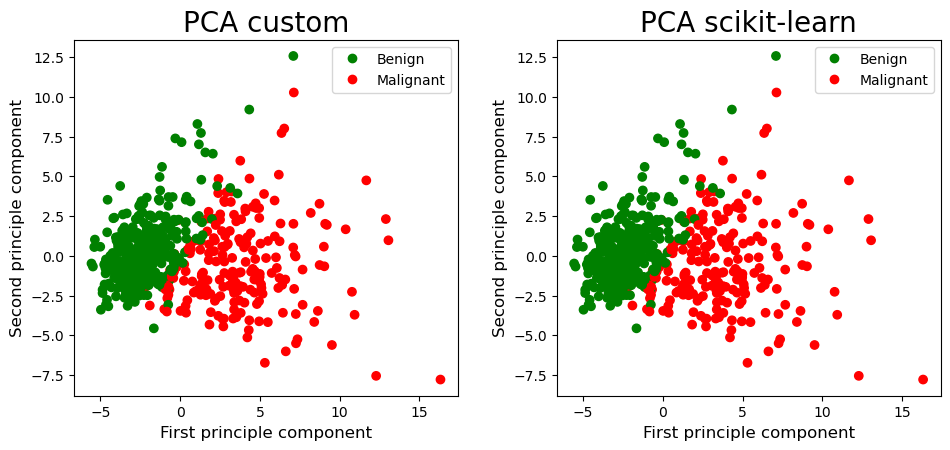

In [32]:
# Create a list of colors to map 1 to green (Benign) and 0 to red (Malignant)
colors = ['green' if target == 1 else 'red' for target in cancer['target']]

# Create a scatter plot of the PCA data, colored by target
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(pca_data_2d[:,0], pca_data_2d[:,1], c=colors)
ax[0].set_title("PCA custom", fontsize=20)

ax[1].scatter(pca_data2d[:,0], pca_data2d[:,1], c=colors)
ax[1].set_title("PCA scikit-learn", fontsize=20)

labels = {1: 'Benign', 0: 'Malignant'}
for i in range(2):
    ax[i].set_xlabel('First principle component', fontsize=12)
    ax[i].set_ylabel('Second principle component', fontsize=12)
    ax[i].legend(handles=[
        plt.plot([],[],color='green', marker='o', linestyle='none', label=labels[1])[0],
        plt.plot([],[],color='red', marker='o', linestyle='none', label=labels[0])[0]
    ], loc="upper right")

plt.tight_layout(pad=2.5)
plt.show()

#### 3D

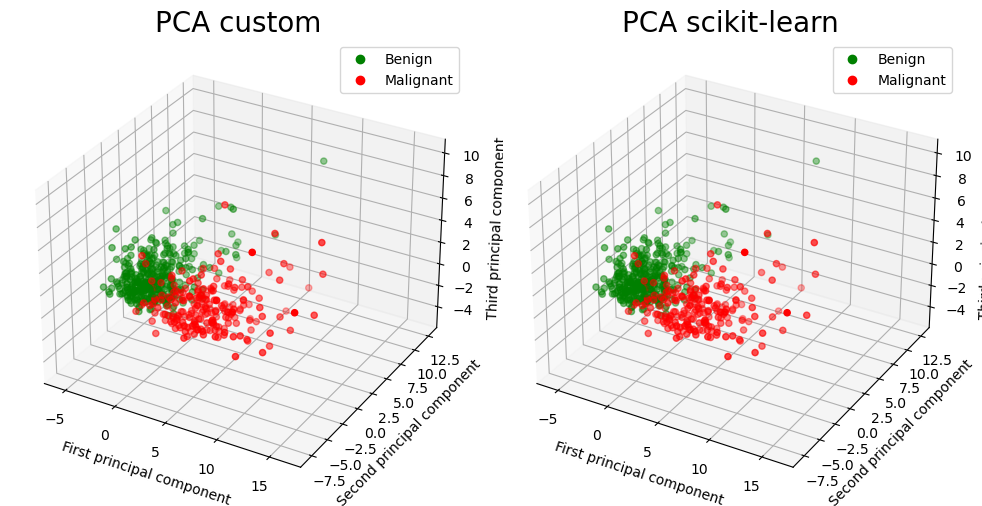

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

ax[0].scatter(pca_data_3d[:,0], pca_data_3d[:,1], pca_data_3d[:,2], c=colors)
ax[0].set_title("PCA custom", fontsize=20)

ax[1].scatter(pca_data3d[:,0], pca_data3d[:,1], pca_data3d[:,2], c=colors)
ax[1].set_title("PCA scikit-learn", fontsize=20)

# Set axis labels and legend
labels = {1: 'Benign', 0: 'Malignant'}
for i in range(2):
    ax[i].set_xlabel('First principal component')
    ax[i].set_ylabel('Second principal component')
    ax[i].set_zlabel('Third principal component')
    ax[i].legend(handles=[
        plt.plot([],[],color='green', marker='o', linestyle='none', label=labels[1])[0],
        plt.plot([],[],color='red', marker='o', linestyle='none', label=labels[0])[0]
    ], loc="upper right")

plt.tight_layout()
plt.show()

### Conclusions

- The benign cases are generally more closely clustered together and are located closer to the y-axis, which corresponds to the second principal component. This suggests that the **second principal component** is more important for **distinguishing between different types of benign cases.** 
- In contrast, the malignant cases are more scattered and extend more along the x-axis, which corresponds to the first principal component. This indicates that the **first principal component** is more important for **distinguishing between different types of malignant cases.**
- Overall, this suggests that the **principal components are able to capture a significant amount of the variation in the data**, and that they are **able to distinguish between benign and malignant cases** using different criteria.
- Nonetheless, to draw a conclusion about the relative importance of the principal components in *distinguishing between benign and malignant cases*, we would need to perform further analysis.